In [49]:
import matplotlib as mpl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


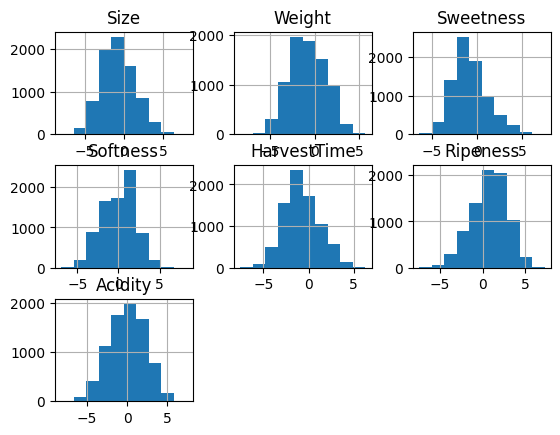

In [65]:
df = pd.read_csv('banana_quality.csv')
ndf=df[["Size","Weight","Sweetness","Softness","HarvestTime","Ripeness","Acidity","Quality"]]
ndf.hist()
df.head()

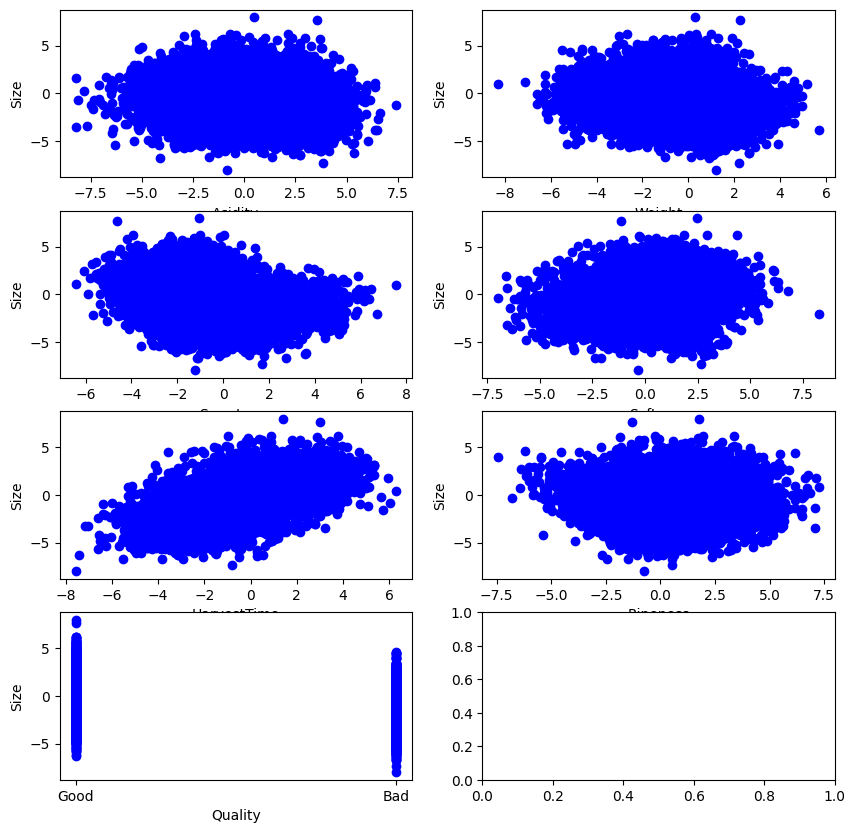

In [40]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
for i, e in enumerate(ndf[["Acidity","Weight","Sweetness","Softness","HarvestTime","Ripeness","Quality"]]):
    axs[i // 2, i % 2].scatter(ndf[e], ndf["Size"], color='blue')
    axs[i // 2, i % 2].set_xlabel(e)
    axs[i // 2, i % 2].set_ylabel("Size")

Text(0.5, 1.0, 'Size distribution')

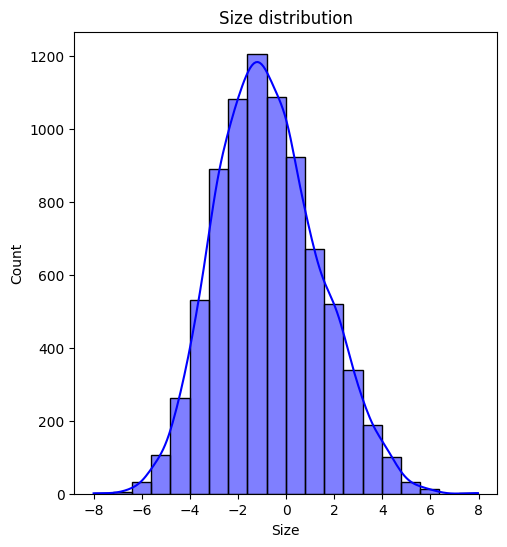

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(ndf["Size"], bins=20, kde=True, color='blue')
plt.title("Size distribution")

In [42]:
X = df[["Weight","Sweetness","Softness","HarvestTime","Ripeness","Acidity","Quality"]]
y = df["Size"]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(8000, 7)


((6400, 7), (1600, 7), (6400,), (1600,))

In [54]:
# Assuming X_train is a DataFrame
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred

array([-1.25820014, -1.26328307, -2.2026738 , ..., -1.66108902,
        0.24797719, -1.01438444])

In [52]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(2.4329079793409356)

In [56]:
mean_squared_error(y_test, lr_model.predict(X_test))

np.float64(2.4329079793409356)

In [58]:
y_test.shape, y_pred.shape

((1600,), (1600,))

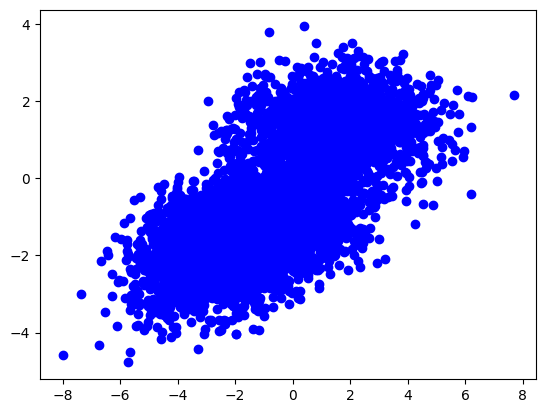

In [59]:
plt.scatter(y_train, lr_model.predict(X_train), color='blue')

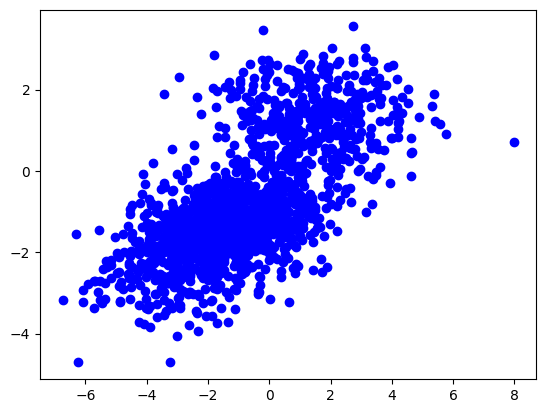

In [60]:
plt.scatter(y_test, y_pred, color='blue')

In [61]:
print("Coefficients: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficients:  [-2.41337326e-01 -2.54327346e-01  1.65901613e-03  4.00818223e-01
 -1.17796476e-01 -2.41388937e-03  1.83246078e+00]
Intercept:  -1.6532308353469811


In [87]:
bananas_data = pd.read_csv('banana_quality.csv')
bananas_data['Quality'] = bananas_data['Quality'].apply(lambda x: 1 if x == 'Good' else 0)
X_df = bananas_data[["Size","Weight","Sweetness","Softness","HarvestTime","Ripeness","Acidity"]]
y_df = bananas_data[["Quality"]]
bananas = pd.concat([X_df, y_df], axis=1)
bananas.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [88]:
bananas.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

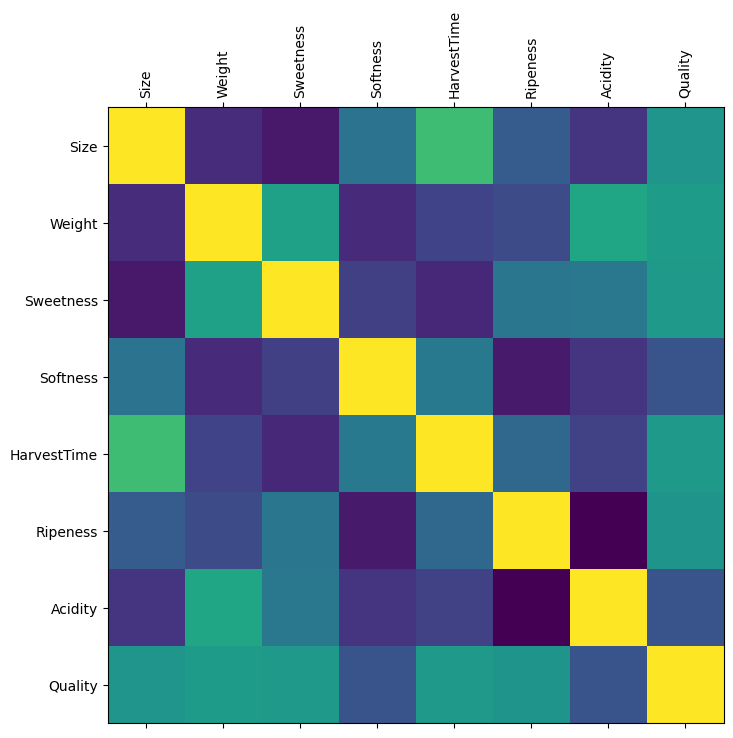

In [99]:
cm = bananas.corr()

fig, ax = plt.subplots(figsize=(8, 8)) 
ax.matshow(cm)
plt.xticks(range(len(cm.columns)), cm.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(cm.columns)), cm.columns)

plt.show()

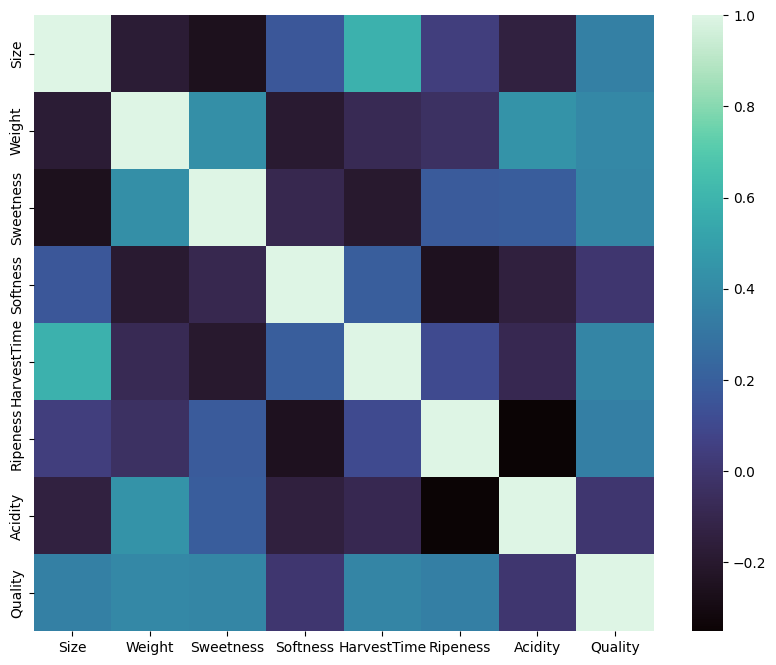

In [105]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, ax=ax, cmap= "mako")
plt.show()

In [107]:
bananas["Quality"].value_counts()

Quality
1    4006
0    3994
Name: count, dtype: int64

<Axes: xlabel='Quality', ylabel='Count'>

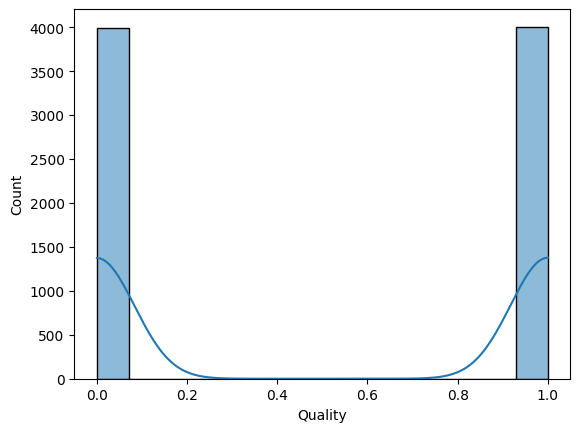

In [108]:
sns.histplot(bananas["Quality"], kde=True)

<Axes: xlabel='Size', ylabel='Count'>

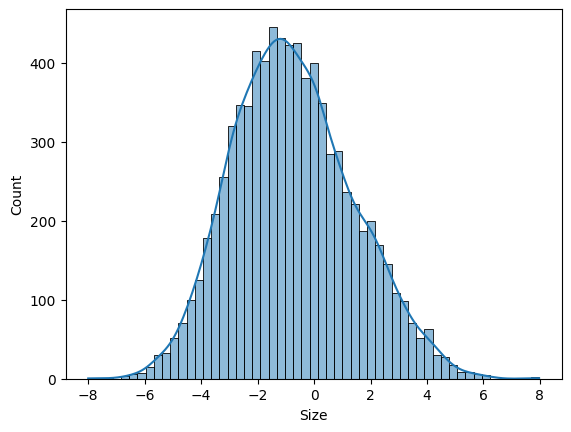

In [113]:
sns.histplot(bananas["Size"], kde = True)

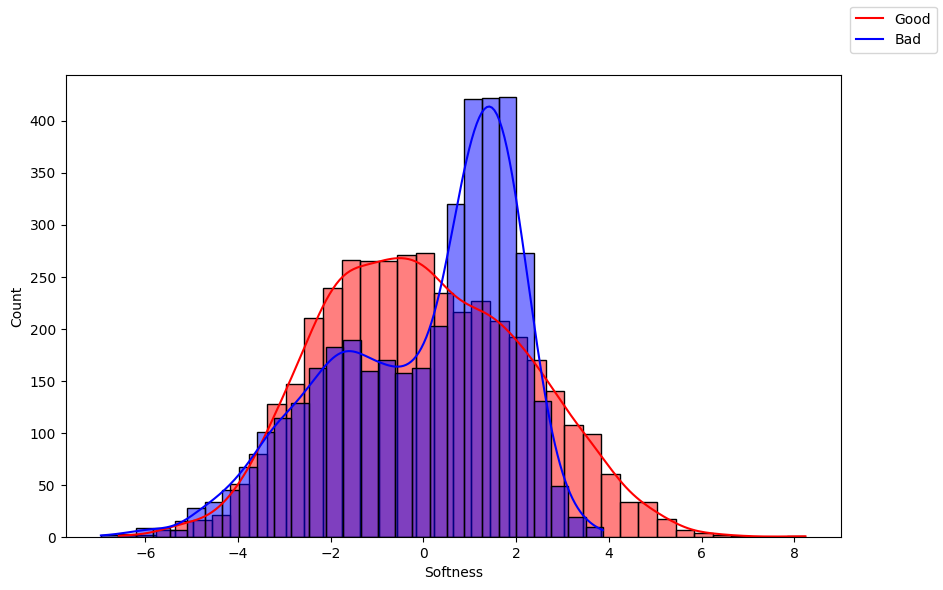

In [125]:
ds_true = bananas[bananas["Quality"] == 1]
ds_false = bananas[bananas["Quality"] == 0]

fig, ax = plt.subplots(figsize=(10, 6))

var= "Softness"

sns.histplot(ds_true[var], kde=True, color="red", ax=ax)
sns.histplot(ds_false[var], kde=True, color="blue", ax=ax)

fig.legend(labels=["Good", "Bad"])